In [5]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from cycler import cycler

from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Introduction

In this notebook I run through the theory asociated with the microbial competition experiments. The basic idea is to develop a model which describes the temperature dependence of respiratory flux in communities with interacting species. This requires the model to not only describe the temperature dependence of metabolism itself (as classic MTE does) but also the change in flux that occurs due to the temperature dependence of species interactions. 

First I show how the temperature dependence of total respiratory flux of a population can be approximated assuming a temperature dependence of growth rate. I then describe growth in communities in multiple non-interacting species before moving to communities with species interactions. For now all of these models describe communities in the exponential growth phase where I assume that resources are non-limited (as is the case in the experiments). 

# Single Species model

First I will show how the temperature dependence of total respiratory flux of a population can be derived from the temperature dependence of its mass-specific respiration and carbon biomass growth. The total respiratory flux of carbon for a single species popualtion $s$ is equal to it's mass specific flux times its biomass

\begin{align}
    R_s = C_s \tilde{R}_s
\end{align}

where $R_s$ is the total respiratory flux of species $s$, $C_s$ the carbon biomass and $\tilde{R}$ the mass-specific respiratory flux. In order to determine the temperature dependence of total flux we need to work out the temperature dependence of both the biomass and mass-specific respiration. 

## Temperature dependence of respiration

Obtaining the temperature dependence of respiration ($\tilde{R}_s$) is easy as we can simply use the Arrhenius equation to represent the respiratory rate:

\begin{align}
    \tilde{R}_s(T) = \tilde{R_s}_0 e^{-E_\tilde{R_s} (T_r - T_{ra})}
\end{align}

where $\tilde{R}_s(T)$ is the respiration at temperature $T$, $\tilde{R}_{s_0}$ is respiration at some reference temperature, $E_{\tilde{R}_s}$ is the the tempeature sensitivty of respiration and $T_r$ and $T_{ra}$ are the Boltzmann corrected temperature and reference temperature respectively ($T \to\frac{1}{kT}$). Thus the equation for total flux becomes:

\begin{align}
    R_s = C_s \tilde{R_s}_0 e^{-E_\tilde{R_s} (T_r - T_{ra})}
\end{align}

## Temperature dependence of biomass

Obtaining the temperature dependence of carbon biomass is more difficult as biomass is not directly dependent on temperature. Instead temperature affects the rate of biomass change in the population meaning that its effects are time dependent. Thus, we must also account for time when looking at the temperature dependence of biomass. I start with the basic observation that change in carbon biomass is simply the carbon uptake minus carbon loss:

\begin{align}
    \frac{dC}{dt} = \text{uptake} - \text{loss}
\end{align}

So to get the temperature dependence of growth we must obtain the temperature dependence of these two rates. 

### Uptake

A common approach to model the uptake of carbon in microbes is to use a Michaelis-Menten type model:

\begin{align}
    \mu = \mu_{max} \frac{C}{k_s + C}
\end{align}

where $\mu$ is the uptake rate (and $\mu_{max}$ the maximum uptake rate), $C$ is the amount of carbon avalible in the enviroment and $k_s$ is the half saturation constant at which carbon uptake is 50% of the maximum. Given that we are modeling popualtions in the exponential growth phase we assume that resources are not limiting such that ${C\to\infty}$ meaning that the value of $\frac{C}{k_s + C} \to 1$. Thus we can use the first order approximation to represent uptake $\mu = \mu_{max}$.

### Loss

I assume here that the loss of carbon occurs solely via respiratory losses. In doing so I ignore mortality as it is likley small in regards to other carbon fluxes in the system. As noted above, this respiratory flux can be represented simply as a single Arrhenius equation meaning the total equation for biomass growth becomes:

\begin{align}
    \frac{dC}{dt} &= \mu - R
\end{align}

A common approach in microbial growth models is to seperate this respiration term into 
respiration for growth $R_g$ and respiration for maintenence $R_m$ such that $R = R_g + R_m$.
Here, maintenence respiration is constant, whilst growth respiration is assumed to scale carbon uptake. This relationship is commonly assumed to be linear with the parameter $\epsilon$ representing the slope of this dependence. Biologically this is interprested as the inefficency of growth (i.e. the proportion of uptake allocated to growth). This relationship can be reprsented as $R_g = (1 - \epsilon) \mu$ which when substitued into the equation above gives:

\begin{align}
    \frac{dC}{dt} &= \mu - R_g - R_m \\
                  &= \mu - (1 - \epsilon) \mu - R_m \\
                  &= \mu - \mu + \epsilon \mu - R_m \\
                  &= \epsilon \mu - R_m
\end{align}

Whilst this approach allows growth rate to be described across a range of uptake rates the experiment here focuses only on populations in the exponential phase. Thus the assumption is that the uptake rate is constant, meaning we dont need to account for the relationship between uptake and growth respiration. We can therefore use the simpler version of the model above in which respiration is accounted for in a single term.


Taking the simple growth model we can express the rates as mass specific terms

\begin{align}
    \frac{1}{C}\frac{dC}{dt} = \tilde{\mu} - \tilde{R}
\end{align}

and use seperation of variables to get the general solution of this equation (i.e. the biomass of the population at time $t$):

\begin{align}
    C(t) &= C_0 e^{t (\tilde{\mu} - \tilde{R}) } \\
         &= C_0 e^{t  \tilde{\mu}} e^{- t \tilde{R}}
\end{align}

To get the temperature dependence of this process we need only substitute the Boltzmann equation for the $\tilde{\mu}$ and $\tilde{R}$ terms which gives:

\begin{align}
    C(t,T) = C_0 e^{t \tilde{\mu}_0 e^{-E_{\tilde{\mu}} (T_r - T_{ra})}} e^{- t  \tilde{R_m}_0 e^{-E_{\tilde{R_m}} (T_r - T_{ra})}}
\end{align}

In this form it is not possible to get an expression for the temperature dependence of growth (a single coefficent of $(T_r-T_{ra})$) due to the double exponentials. We can take the log and use a taylor expansion around the point $T_r = T_{ra}$ to get around this:

In [6]:
t,e,u_0,E_u,R_0,E_R,C_0,T_r,T_ra = var("t,\epsilon,u_0,E_u,R_0,E_R,C_0,T_r,T_ra")

gr = u_0 * exp(-E_u * (T_r - T_ra))
re = R_0 * exp(-E_R * (T_r - T_ra))

C = C_0 * exp( (t * gr) - (t* re) )

C_log =  expand_log(log(C),force=true)
C_approx = exp(C_log.series(T_r,T_ra,2).removeO())
C_approx

Thus the temperature dependence of biomass is approximately: 

\begin{align}
    E_C \approx E_{\tilde{R}} \tilde{R}_0 t - E_{\tilde{\mu}} \tilde{\mu}_0 t
\end{align}

### Flux temperature dependence

Combining the approximation above with the temperature dependence of respiration we can rewrite the equation for total respiration as:

\begin{align}
    R_s \approx C_0 e^{-\tilde{R}_{s_0} t + \tilde{\mu}_{s_0} t +
                (E_{\tilde{R}_s} \tilde{R}_{s_0} t -
                 E_{\mu_s} \mu_{s_0} t)(T_r - T_{ra})} 
    \tilde{R}_{s_0} e^{-E_{\tilde{R}_s} (T_r - T_{ra})}
\end{align}

which means we can get the coefficent of $(T_r - T_{ra})$ for total respiration:

\begin{align}
    E_{R_s} &\approx -E_{\tilde{R}_s} + E_{\tilde{R}_s} \tilde{R}_{s_0}  t - E_{\tilde{\mu_s}} \tilde{\mu_s}_0 t\\
\end{align}

Looking at this equation we can see several interesting features of the model:

- Increasing the sensitivity of $E_\tilde{R_s}$ will not always increase the sensitvity of total respiration due it it's negative effects on growth rates (Increasing the value of $E_{\tilde{R}_s}$ will only increase $E_{R_s}$ if $\tilde{R}_{s_0}  t > 1$).

- Increasing the time ($t$) will increase the temperature sensitvity of total respiration (due to increase in biomass) but only if $E_{\tilde{R}_s} \tilde{R}_{s_0} < E_{\mu_s} \mu_{s_0}$

# Multispecies model

In this section I will show how we can derive the temperature dependence of total system flux in multispecies communities. I first show how this is possible in two species communities without interactions before generalising to the n-species case and communities where interactions occur. 

## Non-interacting communities

In a system with two species and no interactions the total flux in the system can simply be described as the sum of the species level fluxes:

\begin{align}
        R_{tot} &= R_1 + R_2 \\
                &= C_1 \tilde{R}_1 + C_2 \tilde{R}_2 \\
                &= C_{0_1} \tilde{R}_{1_0} e^{ \gamma_1 + E_{R_1}(T_r - T_{ra})} +
                   C_{0_2} \tilde{R}_{2_0} e^{ \gamma_2 + E_{R_2}(T_r - T_{ra})}
\end{align}

where $\gamma_s = -\tilde{R}_{s_0} t + \mu_{s_0} t$ and $E_{R_s} = -E_\tilde{R_s} + E_{\tilde{R}_s} \tilde{R}_{s_0} t - E_{\mu_s} \mu_{s_0} t$. 

We can use the taylor expansion trick to convert this into a single TPC:

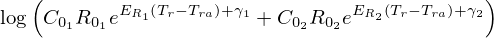

In [7]:
C_01,C_02,R_01,R_02 = var("C_{0_1},C_{0_2},R_{0_1},R_{0_2}")
T_r,T_ra = var("T_r,T_ra")

u_01,u_02 = var("\mu_{0_1},\mu_{0_2}")
E_R1, E_R2, E_u1, E_u2 = var("E_{R_1}, E_{R_2}, E_{u_1}, E_{u_2}")

g1,g2 = var("\gamma_1,\gamma_2")

E_R_1 , E_R_2 = var("E_{R_1},E_{R_2}")

R1 = C_01 * R_01 * exp(g1 + E_R_1*(T_r-T_ra))
R2 = C_02 * R_02 * exp(g2 + E_R_2*(T_r-T_ra))


R_tot = R1 + R2
log(R_tot)

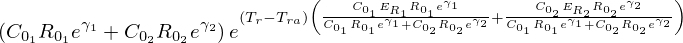

In [8]:
exp((log(R_tot).series(T_r,T_ra,2).removeO()))

This can simplified to the N-species case giving:

\begin{align}
    R_{tot} \approx \sum_{s=0}^{n} C_{0_s} R_{0_s} e^{\gamma_s} 
              e^{(T_r - T_ra) \left(\frac{C_{0_s} R_{0_s} e^{\gamma_s} E_{R_s}}
              {\sum_{p=0}^{n} C_{0_p} R_{0_p} e^{\gamma_p}} \right)}
\end{align}

with $\gamma_s$ and $E_{R_s}$ having the same values as above. From this equation we can see that in a non-interacting community (i.e. where rates of biomass growth are independent) the temperature dependence of total respiratory flux is simply the weighted average of each populations flux:

\begin{align}
    E_{R_{tot}} \approx \sum_{s=0}^{n} \frac{C_{0_s} R_{0_s} e^{\gamma_s} E_{R_s}}
                                            {\sum_{p=0}^{n} C_{0_p} R_{0_p} e^{\gamma_p}}
\end{align}

## Interacting communities

The key aim of the expermental work is to demonstrate how ecological interactions alter flux at the ecosystem level by altering biomass dynamics in the system. In the framework shown here this can be thought of in terms of the general growth model:

\begin{align}
    \frac{1}{C}\frac{dC}{dt} = \tilde{\mu} - \tilde{R}
\end{align}

Though the mechanism of interaction is not clear from the experiments we can interperate the change in observed growth rate as an alteration of the rate of carbon uptake. This is much more likely to occur than a change in respiration which is assumed to mostly be a fixed cost of maintence. This interaction can be expressed in the model above as:

\begin{align}
    \frac{dC}{dt} = \mu(C_1,C_2,\dots,C_n) - R
\end{align}

where $\mu$ is now a function of the biomass of other species in the system. For now we assume that the effect of each species on growth rate can be represented as a simple additive effect such that $\mu_s = \mu_{s_0} + \sum^{n}_{p=0} \alpha_p$ where $\alpha_p$ is the effect of species $p$ on the uptake rate of species $s$. In the two species case this can be written in full as:


\begin{align}
    \frac{1}{C_1}\frac{dC_1}{dt} &= \tilde{\mu}_1 - \tilde{R}_1 = \tilde{\mu}_{1_0} + \alpha_{12} - \tilde{R}_1\\
    \frac{1}{C_2}\frac{dC_2}{dt} &= \tilde{\mu}_2 - \tilde{R}_2 = \tilde{\mu}_{2_0} + \alpha_{21} - \tilde{R}_2
\end{align}

where the flux in the system is the same as in the non-interacting system above:

\begin{align}
R_{tot} = C_1 \tilde{R}_1 + C_2 \tilde{R}_2 \\
\end{align}

Though we have not derived an analytical solution of the temperature dependence of flux in this system yet the results of some simulations offer insight into the effects of these interactions on system flux. 

### Simulations

For the simulations I used measurements of the temperature dependence of growth and respiration from a number of bacterial species. I then calculated the rate of uptake ($r = \mu - R \to \mu = r + R$) and used this to parameterise the model above. I simulated the biomass dynamics of pairs of species over time at different levels of interaction (from facilitation to competition). As expected moving from facilitation to competitive interactions results in a redcution of growth rate and thus a reduction in biomass at any given timepoint:

<img src="figures/simulations/single_pair.png">



From these same simulations we can see how respiratory flux changes slower over time in more competitive communities:
<img src="figures/simulations/single_pair_time.png" width="400px">

And when simulated over multiple temperatures, how the response of respiration to temperature is altered as interactions change:
    <img src="figures/simulations/single_pair_temp.png" width = "400px">

I then chose 100 random pairs of species from the dataset and simulated their biomass growth across a range of temperatures and interaction strengths. The figure below shows the results of these simulations with each line representing a single species pair and the relationship between it's temperature response (a fitted $E_R$ value) and the interaction parameter (i.e. moving from competition when $\alpha < 0$ to facilitation when $\alpha > 0$).
<img src="figures/simulations/multi_pair_interaction.png">

The figure on the left shows the actual change in $E$ values over the range of interaction strengths whilst the figure on the right shows the change in $E$ values relative to the point where $\alpha = 0$. As we can see the general trend is for the temperature sensitvity of respiratory fluc to increase as interactions move from competitive to facilitative. This trend is dependent on the other factors affecting growth and respiration meaning that the strength of the relationship between interactions and temperature sensitivity varies between species pairs. 